In [1]:
import pandas as pd

In [55]:
sjdf = pd.read_parquet("../data/evals/Qwen/Qwen3-32B-self-judge/details/Qwen/Qwen3-32B/2025-07-14T11-58-54.309709/details_lighteval|aime24|0_2025-07-14T11-58-54.309709.parquet")
tdf = pd.read_parquet("../data/evals/Qwen/Qwen3-32B-thinking/details/Qwen/Qwen3-32B/2025-07-14T12-14-40.446749/details_lighteval|aime24|0_2025-07-14T12-14-40.446749.parquet")

In [56]:
sjdf_acc = sjdf.metric.map(lambda x: x['math_pass@1:1_samples']).tolist()

In [57]:
tdf_acc = tdf.metric.map(lambda x: x['math_pass@1:1_samples']).tolist()

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Anthropic-inspired color palette
ANTHROPIC_ORANGE = '#D97757'
ANTHROPIC_LIGHT = '#FFF4F0'
ANTHROPIC_DARK = '#1F1F1F'
ANTHROPIC_GRAY = '#666666'

def create_anthropic_colormap():
    """Create a custom colormap inspired by Anthropic's colors."""
    colors = [
        (1.0, 0.95, 0.94),  # Very light peach (low values)
        (1.0, 0.85, 0.80),  # Light peach
        (0.85, 0.47, 0.34),  # Anthropic orange (high values)
    ]
    n_bins = 100
    cmap_name = 'anthropic'
    return LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

def set_anthropic_style():
    """Set matplotlib style to match Anthropic's aesthetic."""
    plt.rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
        'font.size': 11,
        'axes.labelsize': 12,
        'axes.titlesize': 14,
        'axes.titleweight': 'normal',
        'axes.edgecolor': ANTHROPIC_GRAY,
        'axes.linewidth': 0.8,
        'grid.alpha': 0.3,
        'grid.color': ANTHROPIC_GRAY,
    })

def plot_accuracy_comparison(sjdf_acc, tdf_acc, figsize=(12, 2)):
    """
    Create a 2×N heatmap comparing question-wise accuracy between two methods.
    Uses Anthropic's visual style.

    Parameters:
    -----------
    sjdf_acc : list or array
        Accuracy values for SJDF method
    tdf_acc : list or array
        Accuracy values for TDF method
    figsize : tuple
        Figure size (width, height)

    Returns:
    --------
    fig, ax : matplotlib figure and axis objects
    """
    # Set Anthropic style
    set_anthropic_style()

    # Convert to numpy arrays if needed
    sjdf_acc = np.array(sjdf_acc)
    tdf_acc = np.array(tdf_acc)

    # Verify same length
    assert len(sjdf_acc) == len(tdf_acc), "Both accuracy lists must have the same length"

    # Create 2×N array for heatmap
    accuracy_matrix = np.vstack([sjdf_acc, tdf_acc])

    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize, facecolor='white')

    # Create custom colormap
    anthropic_cmap = create_anthropic_colormap()

    # Create heatmap
    sns.heatmap(accuracy_matrix,
                annot=False,
                cmap=anthropic_cmap,
                vmin=0, vmax=1,
                cbar_kws={
                    'orientation': 'vertical',
                    'ticks': [0.25, 0.75],
                    'pad': 0.02
                },
                xticklabels=[f'Q{i+1}' for i in range(len(sjdf_acc))],
                yticklabels=['Self-Judge + Adaptive', 'Always Thinking'],
                ax=ax,
                linewidths=1,
                linecolor='white',
                square=False)

    # Customize colorbar
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=10, color=ANTHROPIC_GRAY)
    cbar.ax.yaxis.label.set_color(ANTHROPIC_DARK)
    cbar.outline.set_edgecolor(ANTHROPIC_GRAY)
    cbar.ax.set_yticklabels(['False', 'True'])

    # set yticklabels to rotate 90'
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    # Set labels and title
    ax.set_xlabel('Questions', fontsize=12, color=ANTHROPIC_DARK)
    ax.set_ylabel('Methods', fontsize=12, color=ANTHROPIC_DARK)
    ax.set_title("AIME'24",
                 fontsize=14, color=ANTHROPIC_DARK, pad=20)

    # Style tick labels
    ax.tick_params(colors=ANTHROPIC_DARK, which='both')

    # Rotate x-axis labels if many questions
    if len(sjdf_acc) > 15:
        plt.xticks(rotation=45, ha='right')

    # Remove top and right spines for cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()

    return fig, ax

(<Figure size 1200x200 with 2 Axes>,
 <Axes: title={'center': "AIME'24"}, xlabel='Questions', ylabel='Methods'>)

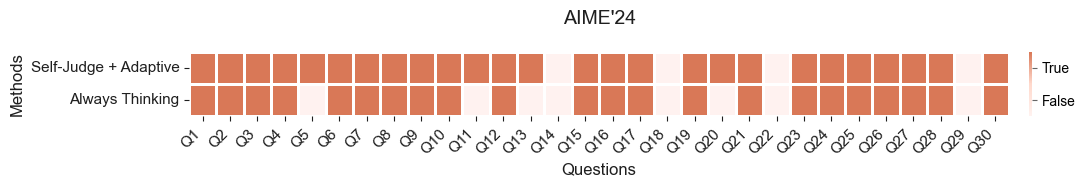

In [68]:
plot_accuracy_comparison(sjdf_acc, tdf_acc)

In [59]:
sjdf.metric

0     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
1     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
2     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
3     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
4     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
5     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
6     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
7     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
8     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
9     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
10    {'math_pass@1:1_samples': 1.0, 'self_judged_th...
11    {'math_pass@1:1_samples': 1.0, 'self_judged_th...
12    {'math_pass@1:1_samples': 1.0, 'self_judged_th...
13    {'math_pass@1:1_samples': 0.0, 'self_judged_th...
14    {'math_pass@1:1_samples': 1.0, 'self_judged_th...
15    {'math_pass@1:1_samples': 1.0, 'self_judged_th...
16    {'math_pass@1:1_samples': 1.0, 'self_judged_th...
17    {'math_pass@1:1_samples': 0.0, 'self_judge

In [66]:
tdf.metric

0     {'math_pass@1:1_samples': 1.0}
1     {'math_pass@1:1_samples': 1.0}
2     {'math_pass@1:1_samples': 1.0}
3     {'math_pass@1:1_samples': 1.0}
4     {'math_pass@1:1_samples': 0.0}
5     {'math_pass@1:1_samples': 1.0}
6     {'math_pass@1:1_samples': 1.0}
7     {'math_pass@1:1_samples': 1.0}
8     {'math_pass@1:1_samples': 1.0}
9     {'math_pass@1:1_samples': 1.0}
10    {'math_pass@1:1_samples': 0.0}
11    {'math_pass@1:1_samples': 1.0}
12    {'math_pass@1:1_samples': 0.0}
13    {'math_pass@1:1_samples': 0.0}
14    {'math_pass@1:1_samples': 1.0}
15    {'math_pass@1:1_samples': 1.0}
16    {'math_pass@1:1_samples': 1.0}
17    {'math_pass@1:1_samples': 0.0}
18    {'math_pass@1:1_samples': 1.0}
19    {'math_pass@1:1_samples': 0.0}
20    {'math_pass@1:1_samples': 1.0}
21    {'math_pass@1:1_samples': 0.0}
22    {'math_pass@1:1_samples': 1.0}
23    {'math_pass@1:1_samples': 1.0}
24    {'math_pass@1:1_samples': 1.0}
25    {'math_pass@1:1_samples': 1.0}
26    {'math_pass@1:1_samples': 1.0}
2